# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
file_x_train = "./UCI HAR Dataset/x_train.csv"
file_x_test = "./UCI HAR Dataset/x_test.csv"

file_y_train = "./UCI HAR Dataset/train/Y_train.txt"
file_y_test = "./UCI HAR Dataset/test/Y_test.txt"

x_ = pd.read_csv(file_x_train)
x_test = pd.read_csv(file_x_test)

y_ = pd.read_csv(file_y_train, header=None)
y_test = pd.read_csv(file_y_test, header=None)


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(x_, y_, test_size=.25, random_state=1729)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [30]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1729).fit(X_train, y_train)

y_pred = clf.predict(X_valid)
importances = clf.feature_importances_

top_features = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)[:3]
print(f"\nAs 3 variáveis mais importantes são: {top_features}")




As 3 variáveis mais importantes são: [560, 395, 561]


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [53]:
# Selecionar as colunas correspondentes às 3 variáveis mais importantes
top_columns = [560, 395, 561]

X_train_top = X_train.iloc[:, top_columns]
X_valid_top = X_valid.iloc[:, top_columns]
X_test_top = x_test.iloc[:, top_columns]


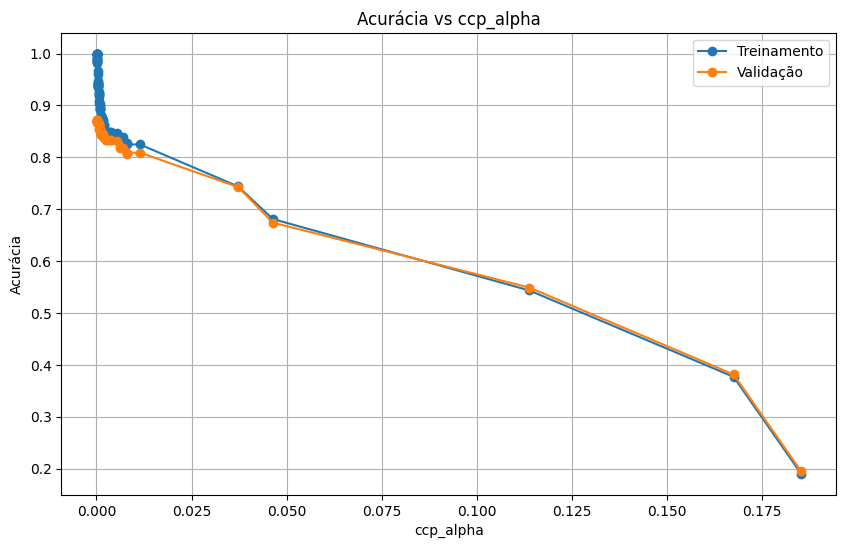

In [55]:
clf0 = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
path = clf0.cost_complexity_pruning_path(X_train_top, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_alphas_positive_unique = sorted(set(ccp_alphas[ccp_alphas > 0]))

clfs0 = []
for ccp_alpha in ccp_alphas_positive_unique:
    clf0 = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_top, y_train)
    clfs0.append(clf0)
    
    
train_scores = [clf.score(X_train_top, y_train) for clf in clfs0]
valid_scores = [clf.score(X_valid_top, y_valid) for clf in clfs0]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas_positive_unique, train_scores, label="Treinamento", marker='o')
plt.plot(ccp_alphas_positive_unique, valid_scores, label="Validação", marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Acurácia")
plt.title("Acurácia vs ccp_alpha")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs0[ind_melhor_arvore]

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

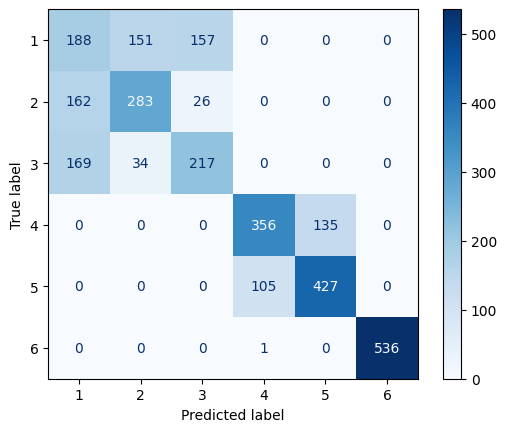

In [58]:
y_test_pred = melhor_arvore.predict(X_test_top)

conf_matrix = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=melhor_arvore.classes_)
disp.plot(cmap="Blues", colorbar=True)